Preview of the dataset:
   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0005  0.0004  100.0  518.67  642.36  1583.23  1396.84  14.62   
1   1   2  0.0008 -0.0003  100.0  518.67  642.50  1584.69  1396.89  14.62   
2   1   3 -0.0014 -0.0002  100.0  518.67  642.18  1582.35  1405.61  14.62   
3   1   4 -0.0020  0.0001  100.0  518.67  642.92  1585.61  1392.27  14.62   
4   1   5  0.0016  0.0000  100.0  518.67  641.68  1588.63  1397.65  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  522.31  2388.01  8145.32  8.4246  0.03  391  2388  100.0  39.11   
1  ...  522.42  2388.03  8152.85  8.4403  0.03  392  2388  100.0  38.99   
2  ...  522.03  2388.00  8150.17  8.3901  0.03  391  2388  100.0  38.85   
3  ...  522.49  2388.08  8146.56  8.3878  0.03  392  2388  100.0  38.96   
4  ...  522.58  2388.03  8147.80  8.3869  0.03  392  2388  100.0  39.14   

        25  
0  23.3537  
1  23.4491  
2  23.3669  
3  23.2951

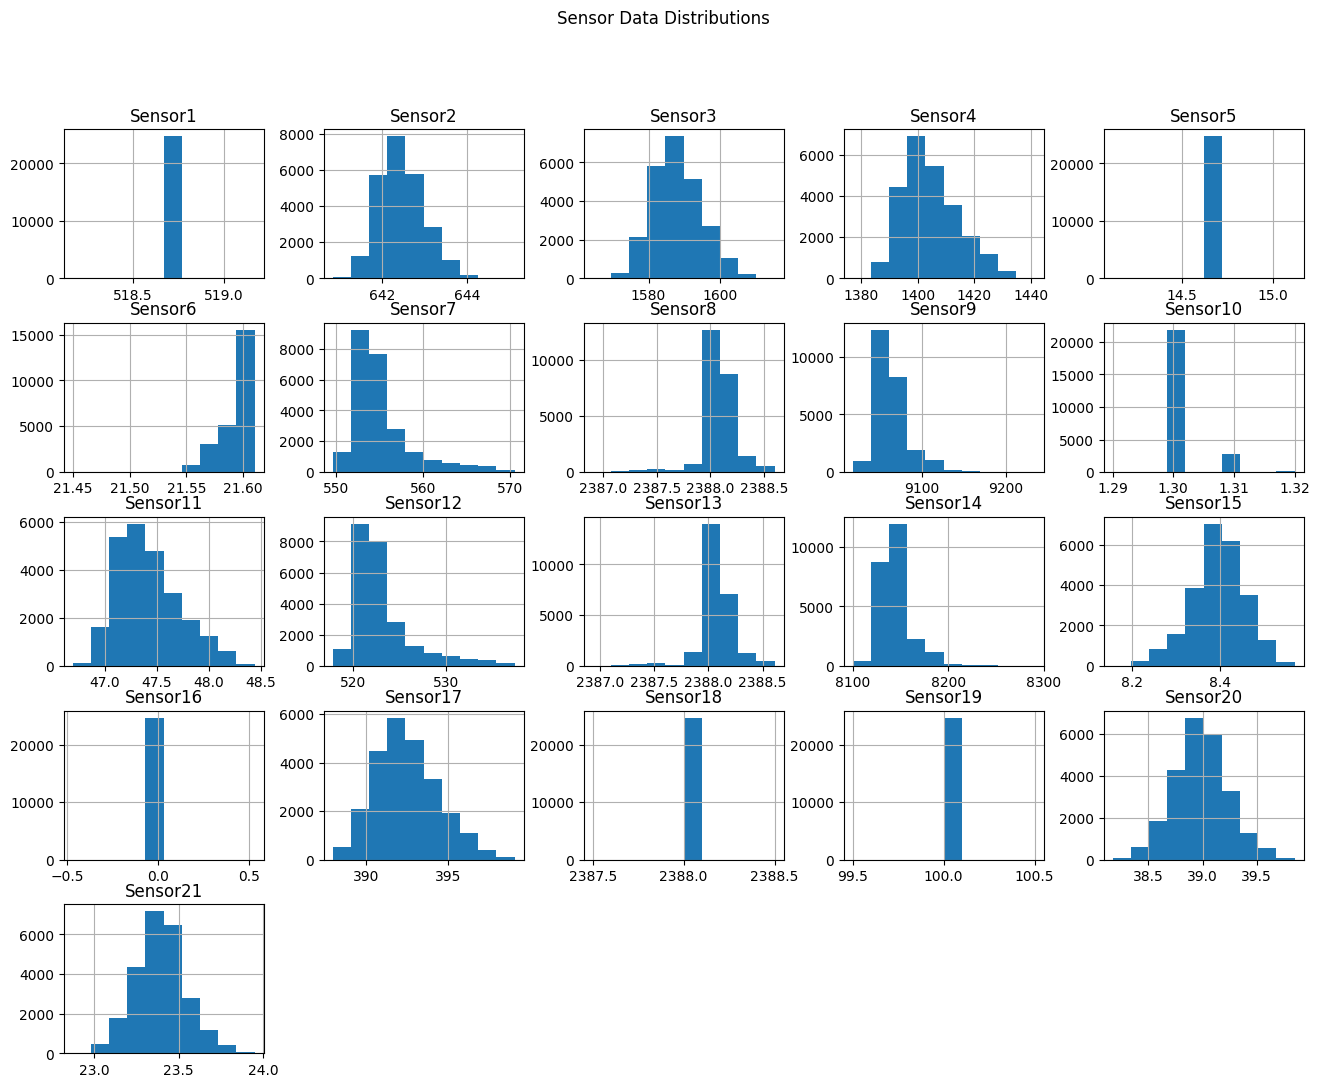

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load new dataset (replace with your new file path)
new_dataset_path = '/content/train_FD003.txt'

# Load the dataset and inspect the first few rows
new_data = pd.read_csv(new_dataset_path, sep=" ", header=None)
new_data.dropna(axis=1, inplace=True)  # Clean up any extra columns
print("Preview of the dataset:")
print(new_data.head())

# Determine column names dynamically
# Assuming the first few columns are Engine ID, Cycle, and Operational Settings
num_columns = new_data.shape[1]
if num_columns == 26:  # Same structure as previous
    new_data.columns = ['Engine ID', 'Cycle', 'OpSetting1', 'OpSetting2', 'OpSetting3'] + [f'Sensor{i}' for i in range(1, 22)]
elif num_columns > 26:  # Extra columns present
    new_data.columns = ['Engine ID', 'Cycle', 'OpSetting1', 'OpSetting2', 'OpSetting3'] + [f'Sensor{i}' for i in range(1, 22)] + [f'ExtraCol{i}' for i in range(1, num_columns - 26 + 1)]
else:  # Fewer columns
    print(f"Dataset has fewer columns ({num_columns}). Adjusting column names...")
    num_sensors = num_columns - 3  # Deduct Engine ID, Cycle, and 1 Operational Setting
    new_data.columns = ['Engine ID', 'Cycle', 'OpSetting1'] + [f'Sensor{i}' for i in range(1, num_sensors + 1)]

# Descriptive statistics
print("Descriptive Statistics:")
print(new_data.describe())

# Plot histograms for sensors
sensor_columns = [col for col in new_data.columns if 'Sensor' in col]
if sensor_columns:
    new_data[sensor_columns].hist(figsize=(16, 12))
    plt.suptitle('Sensor Data Distributions')
    plt.show()
else:
    print("No sensor data columns detected for histogram plotting.")


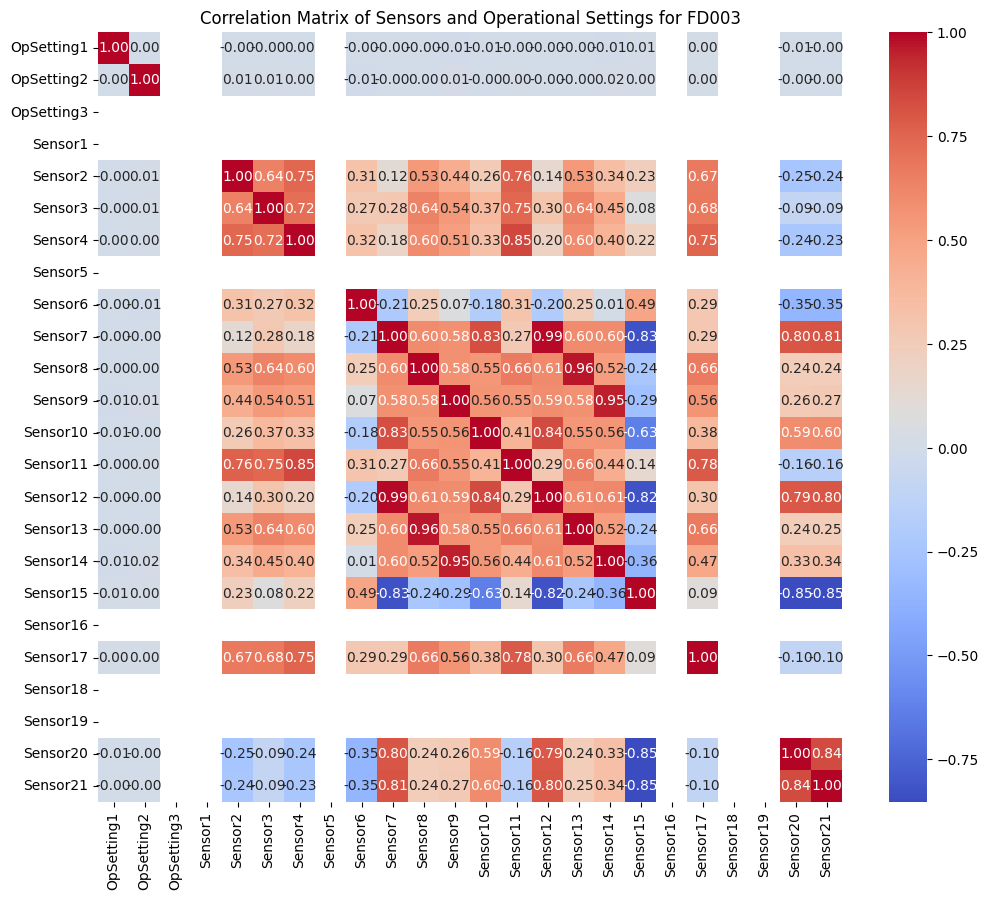

Correlation of features with RUL:
RUL           1.000000
Sensor20      0.037782
Sensor21      0.033465
OpSetting1    0.003700
OpSetting2   -0.001204
Sensor15     -0.016501
Sensor6      -0.215352
Sensor7      -0.315048
Sensor12     -0.329452
Sensor10     -0.363432
Sensor14     -0.481807
Sensor9      -0.551843
Sensor2      -0.590564
Sensor3      -0.624236
Sensor17     -0.649220
Sensor8      -0.655345
Sensor13     -0.656340
Sensor4      -0.657224
Sensor11     -0.688915
OpSetting3         NaN
Sensor1            NaN
Sensor5            NaN
Sensor16           NaN
Sensor18           NaN
Sensor19           NaN
Name: RUL, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load FD002 dataset
train_fd002 = pd.read_csv('/content/train_FD003.txt', sep=" ", header=None)
train_fd002.dropna(axis=1, inplace=True)  # Remove extra columns
train_fd002.columns = ['Engine ID', 'Cycle', 'OpSetting1', 'OpSetting2', 'OpSetting3'] + [f'Sensor{i}' for i in range(1, 22)]

# Standardize data (exclude Engine ID and Cycle)
numeric_columns = train_fd002.columns[2:]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_fd002[numeric_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Calculate and plot the correlation matrix
correlation_matrix = scaled_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Sensors and Operational Settings for FD003')
plt.show()

# Add RUL column
train_fd002['Max Cycle'] = train_fd002.groupby('Engine ID')['Cycle'].transform('max')
train_fd002['RUL'] = train_fd002['Max Cycle'] - train_fd002['Cycle']
train_fd002.drop(columns=['Max Cycle'], inplace=True)

# Correlation with RUL
correlations_with_rul = scaled_df.join(train_fd002['RUL']).corr()['RUL'].sort_values(ascending=False)
print("Correlation of features with RUL:")
print(correlations_with_rul)


Loading FD003 dataset...
Calculating RUL...
Performing feature engineering...
Preparing data...
Scaling features...
Training Random Forest model with RandomizedSearchCV...
Training a new Random Forest model...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Saved optimized Random Forest model.
Making predictions...
Optimized Random Forest Test RMSE: 46.65138106908742
Optimized Random Forest Test R^2: -0.27004808810026826


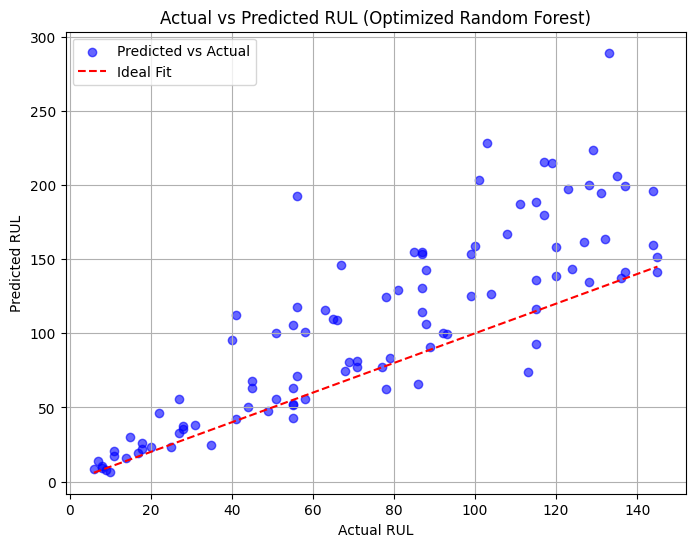


Predicted Class Distribution:
Predicted Classification
Healthy     75
Warning     21
Critical     4
Name: proportion, dtype: int64

Actual Class Distribution:
Actual Classification
Healthy     71
Warning     24
Critical     5
Name: proportion, dtype: int64
Results saved to 'optimized_rf_fd003_predictions_with_classifications.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import joblib

# Load FD003 dataset
print("Loading FD003 dataset...")
train_data = pd.read_csv('/content/train_FD003.txt', sep="\s+", header=None)
test_data = pd.read_csv('/content/test_FD003.txt', sep="\s+", header=None)
rul_test = pd.read_csv('/content/RUL_FD003.txt', header=None)

# Assign column names based on dataset description
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Feature Engineering: Adding rolling statistics
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Prepare training and testing data
print("Preparing data...")
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test sets
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features for reproducibility
joblib.dump(scaler, 'scaler_fd003.pkl')
joblib.dump(features.tolist(), 'features_fd003.pkl')

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Train or load Random Forest model
print("Training Random Forest model with RandomizedSearchCV...")
rf_model_path = 'optimized_rf_model_fd003.pkl'
try:
    rf_model = joblib.load(rf_model_path)
    print("Loaded pre-trained Random Forest model.")
except FileNotFoundError:
    print("Training a new Random Forest model...")
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=20,  # Number of random combinations to try
        scoring='neg_mean_squared_error',
        cv=3,
        random_state=42,
        verbose=2,
        n_jobs=-1
    )
    random_search.fit(X_train_scaled, y_train)
    rf_model = random_search.best_estimator_
    joblib.dump(rf_model, rf_model_path)
    print("Saved optimized Random Forest model.")

# Make predictions
print("Making predictions...")
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized Random Forest Test RMSE: {rmse}")
print(f"Optimized Random Forest Test R^2: {r2}")

# Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Optimized Random Forest)')
plt.legend()
plt.grid()
plt.show()

# Define RUL Categories
def classify_rul(rul):
    if rul < 10:
        return "Critical"
    elif 10 <= rul <= 50:
        return "Warning"
    else:
        return "Healthy"

# Add Predictions and Classifications
results_df = pd.DataFrame({
    'Engine ID': test_data['Engine ID'].unique(),
    'Predicted RUL': np.round(y_pred),
    'Actual RUL': y_test
})

results_df['Predicted Classification'] = results_df['Predicted RUL'].apply(classify_rul)
results_df['Actual Classification'] = results_df['Actual RUL'].apply(classify_rul)

# Display Class Distributions
predicted_class_distribution = results_df['Predicted Classification'].value_counts(normalize=True) * 100
actual_class_distribution = results_df['Actual Classification'].value_counts(normalize=True) * 100

print("\nPredicted Class Distribution:")
print(predicted_class_distribution.round(0).astype(int))
print("\nActual Class Distribution:")
print(actual_class_distribution.round(0).astype(int))

# Save predictions to CSV
results_df.to_csv('optimized_rf_fd003_predictions_with_classifications.csv', index=False)
print("Results saved to 'optimized_rf_fd003_predictions_with_classifications.csv'.")


Loading FD003 dataset...
Calculating RUL...
Performing feature engineering...
Preparing data...
Scaling features...
Training XGBoost model with RandomizedSearchCV...
Training a new XGBoost model...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Saved optimized XGBoost model.
Making predictions...
Optimized XGBoost Test RMSE: 45.01444745470041
Optimized XGBoost Test R^2: -0.18248319625854492


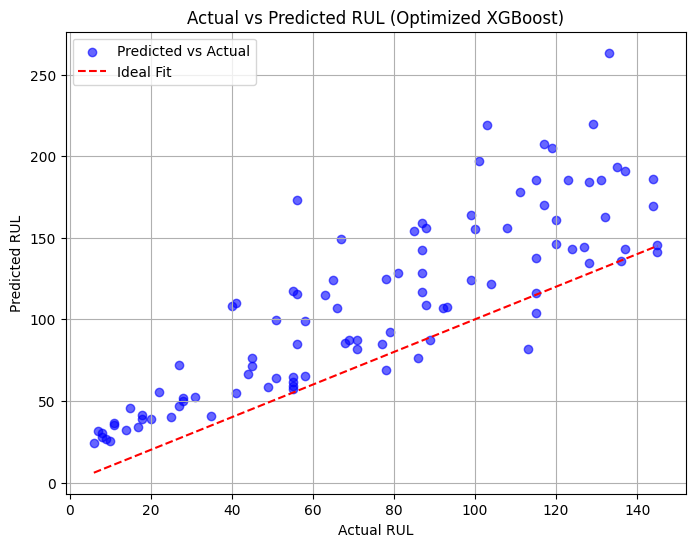


Predicted Class Distribution:
Predicted Classification
Healthy    82
Warning    18
Name: proportion, dtype: int64

Actual Class Distribution:
Actual Classification
Healthy     71
Warning     24
Critical     5
Name: proportion, dtype: int64
Results saved to 'optimized_xgb_fd003_predictions_with_classifications.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import joblib

# Load FD003 dataset
print("Loading FD003 dataset...")
train_data = pd.read_csv('/content/train_FD003.txt', sep="\s+", header=None)
test_data = pd.read_csv('/content/test_FD003.txt', sep="\s+", header=None)
rul_test = pd.read_csv('/content/RUL_FD003.txt', header=None)

# Assign column names based on dataset description
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Feature Engineering: Adding rolling statistics
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Prepare training and testing data
print("Preparing data...")
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test sets
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features for reproducibility
joblib.dump(scaler, 'scaler_fd003.pkl')
joblib.dump(features.tolist(), 'features_fd003.pkl')

# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

# Train or load XGBoost model
print("Training XGBoost model with RandomizedSearchCV...")
xgb_model_path = 'optimized_xgb_model_fd003.pkl'
try:
    xgb_model = joblib.load(xgb_model_path)
    print("Loaded pre-trained XGBoost model.")
except FileNotFoundError:
    print("Training a new XGBoost model...")
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    random_search = RandomizedSearchCV(
        estimator=xgb_reg,
        param_distributions=param_grid,
        n_iter=20,  # Number of random combinations to try
        scoring='neg_mean_squared_error',
        cv=3,
        random_state=42,
        verbose=2,
        n_jobs=-1
    )
    random_search.fit(X_train_scaled, y_train)
    xgb_model = random_search.best_estimator_
    joblib.dump(xgb_model, xgb_model_path)
    print("Saved optimized XGBoost model.")

# Make predictions
print("Making predictions...")
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized XGBoost Test RMSE: {rmse}")
print(f"Optimized XGBoost Test R^2: {r2}")

# Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Optimized XGBoost)')
plt.legend()
plt.grid()
plt.show()

# Define RUL Categories
def classify_rul(rul):
    if rul < 10:
        return "Critical"
    elif 10 <= rul <= 50:
        return "Warning"
    else:
        return "Healthy"

# Add Predictions and Classifications
results_df = pd.DataFrame({
    'Engine ID': test_data['Engine ID'].unique(),
    'Predicted RUL': np.round(y_pred),
    'Actual RUL': y_test
})

results_df['Predicted Classification'] = results_df['Predicted RUL'].apply(classify_rul)
results_df['Actual Classification'] = results_df['Actual RUL'].apply(classify_rul)

# Display Class Distributions
predicted_class_distribution = results_df['Predicted Classification'].value_counts(normalize=True) * 100
actual_class_distribution = results_df['Actual Classification'].value_counts(normalize=True) * 100

print("\nPredicted Class Distribution:")
print(predicted_class_distribution.round(0).astype(int))
print("\nActual Class Distribution:")
print(actual_class_distribution.round(0).astype(int))

# Save predictions to CSV
results_df.to_csv('optimized_xgb_fd003_predictions_with_classifications.csv', index=False)
print("Results saved to 'optimized_xgb_fd003_predictions_with_classifications.csv'.")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Loading FD003 dataset...
Calculating RUL...
Performing feature engineering...
Preparing data...
Scaling features...
Training base models...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6882
[LightGBM] [Info] Number of data points in the train set: 24720, number of used features: 32
[LightGBM] [Info] Start training from score 138.077063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

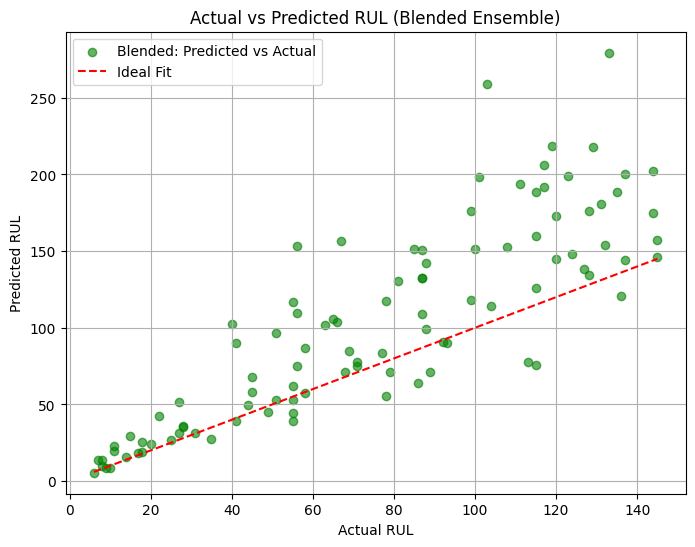


Predicted Class Distribution (Whole Numbers):
Predicted Classification
Healthy     74
Warning     23
Critical     3
Name: proportion, dtype: int64

Actual Class Distribution (Whole Numbers):
Actual Classification
Healthy     71
Warning     24
Critical     5
Name: proportion, dtype: int64
Results saved to 'blended_ensemble_fd003_predictions_with_classifications.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import joblib

# Load FD003 dataset
print("Loading FD003 dataset...")
train_data = pd.read_csv('/content/train_FD003.txt', sep="\s+", header=None)
test_data = pd.read_csv('/content/test_FD003.txt', sep="\s+", header=None)
rul_test = pd.read_csv('/content/RUL_FD003.txt', header=None)

# Assign column names based on dataset description
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Feature Engineering: Adding rolling statistics
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Prepare training and testing data
print("Preparing data...")
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test sets
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features for reproducibility
joblib.dump(scaler, 'scaler_fd003.pkl')
joblib.dump(features.tolist(), 'features_fd003.pkl')

# Train Base Models
print("Training base models...")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42, n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.8)
lgb_model.fit(X_train_scaled, y_train)
lgb_pred = lgb_model.predict(X_test_scaled)

# Blending: Optimize Weights
print("Optimizing blending weights...")

def objective(weights):
    blended_pred = weights[0] * rf_pred + weights[1] * xgb_pred + weights[2] * lgb_pred
    return np.sqrt(mean_squared_error(y_test, blended_pred))

constraints = [{'type': 'eq', 'fun': lambda weights: 1 - sum(weights)}]
bounds = [(0, 1)] * 3
initial_weights = [1/3, 1/3, 1/3]

result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
optimized_weights = result.x
print(f"Optimized Weights: {optimized_weights}")

# Final Blended Prediction
blended_pred = optimized_weights[0] * rf_pred + optimized_weights[1] * xgb_pred + optimized_weights[2] * lgb_pred

# Evaluate the final blended model
blended_rmse = np.sqrt(mean_squared_error(y_test, blended_pred))
blended_r2 = r2_score(y_test, blended_pred)

print(f"Blended Ensemble Test RMSE: {blended_rmse}")
print(f"Blended Ensemble Test R^2: {blended_r2}")

# Visualize Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, blended_pred, color='green', label='Blended: Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Blended Ensemble)')
plt.legend()
plt.grid()
plt.show()

# Define RUL Categories
def classify_rul(rul):
    if rul < 10:
        return "Critical"
    elif 10 <= rul <= 50:
        return "Warning"
    else:
        return "Healthy"

# Add Predictions and Classifications
results_df = pd.DataFrame({
    'Engine ID': test_data['Engine ID'].unique(),
    'Blended Predicted RUL': np.round(blended_pred),
    'Actual RUL': y_test
})

results_df['Predicted Classification'] = results_df['Blended Predicted RUL'].apply(classify_rul)
results_df['Actual Classification'] = results_df['Actual RUL'].apply(classify_rul)

# Display Class Distributions
predicted_class_distribution = results_df['Predicted Classification'].value_counts(normalize=True) * 100
actual_class_distribution = results_df['Actual Classification'].value_counts(normalize=True) * 100

print("\nPredicted Class Distribution (Whole Numbers):")
print(predicted_class_distribution.round(0).astype(int))
print("\nActual Class Distribution (Whole Numbers):")
print(actual_class_distribution.round(0).astype(int))

# Save predictions to CSV
results_df.to_csv('blended_ensemble_fd003_predictions_with_classifications.csv', index=False)
print("Results saved to 'blended_ensemble_fd003_predictions_with_classifications.csv'.")
